### <font color='orangered'>Importing Libraries

In [1]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA, KernelPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

#### <font color='darkblue'>Connecting to Google Drive

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

#### <font color='darkblue'>Unzipping the input data in Google Drive

In [3]:
# !unzip '/content/drive/MyDrive/Drought Data.zip' -d '/content/drive/MyDrive/Drought Data'

### <font color='orangered'>Reading the input data

In [2]:
drought_df = pd.read_csv('train_timeseries.csv')
drought_df.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


### <font color='orangered'>Initial exploration and data cleaning (Data Wrangling)


In [3]:
drought_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300680 entries, 0 to 19300679
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 3.0+ GB


In [4]:
drought_df.isnull().sum()

fips                  0
date                  0
PRECTOT               0
PS                    0
QV2M                  0
T2M                   0
T2MDEW                0
T2MWET                0
T2M_MAX               0
T2M_MIN               0
T2M_RANGE             0
TS                    0
WS10M                 0
WS10M_MAX             0
WS10M_MIN             0
WS10M_RANGE           0
WS50M                 0
WS50M_MAX             0
WS50M_MIN             0
WS50M_RANGE           0
score          16543884
dtype: int64

#### <font color='darkblue'>Missing value Treatment

In [3]:
# Removing the null values in the target variable as the drought score is only available for once in 7 days.
drought_df = drought_df.dropna()
drought_df.isnull().sum()

fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
dtype: int64

#### <font color='darkblue'>Reformatting the data

In [6]:
drought_df.dtypes

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score          float64
dtype: object

In [4]:
drought_df['year'] = pd.DatetimeIndex(drought_df['date']).year
drought_df['month'] = pd.DatetimeIndex(drought_df['date']).month
drought_df['day'] = pd.DatetimeIndex(drought_df['date']).day
drought_df['score'] = drought_df['score'].round().astype(int)
drought_df.dtypes

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score            int64
year             int64
month            int64
day              int64
dtype: object

In [8]:
drought_df['fips'].nunique()

3108

In [9]:
drought_df['score'].round().value_counts()

0    1652230
1     466944
2     295331
3     196802
4     106265
5      39224
Name: score, dtype: int64

### <font color='orangered'>**Exploraory Data Analysis**

#### <font color='darkblue'>Univariate Analysis - Descriptive statistics

In [ ]:
# Descriptive statistics
display(drought_df.describe()) # For numeric columns
display(drought_df.describe(include=['object'])) # For Categorical columns
print("\nSkewness: \n", drought_df.skew(axis = 0, skipna = True))
print("\nKurtosis: \n", drought_df.kurtosis(axis = 0, skipna = True))

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,...,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,day
count,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,...,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06
mean,3.067038e+04,2.714566e+00,9.664736e+01,7.875770e+00,1.289923e+01,7.049350e+00,7.084938e+00,1.876711e+01,7.519916e+00,1.124720e+01,...,1.920655e+00,3.282268e+00,5.532799e+00,7.828799e+00,3.121578e+00,4.707223e+00,8.231266e-01,2.007999e+03,6.520857e+00,1.568997e+01
std,1.497911e+04,6.247590e+00,5.444698e+00,4.721459e+00,1.097040e+01,1.019765e+01,1.014364e+01,1.160295e+01,1.061818e+01,4.038022e+00,...,1.342458e+00,1.943136e+00,2.298550e+00,2.836618e+00,2.109945e+00,2.181020e+00,1.239070e+00,4.897714e+00,3.447033e+00,8.798878e+00
min,1.001000e+03,0.000000e+00,6.649000e+01,1.400000e-01,-3.544000e+01,-3.544000e+01,-3.546000e+01,-3.003000e+01,-4.085000e+01,1.600000e-01,...,0.000000e+00,2.600000e-01,5.100000e-01,8.500000e-01,0.000000e+00,4.200000e-01,0.000000e+00,2.000000e+03,1.000000e+00,1.000000e+00
25%,1.904450e+04,0.000000e+00,9.583000e+01,3.810000e+00,4.580000e+00,-8.800000e-01,-8.400000e-01,1.036000e+01,-5.700000e-01,8.370000e+00,...,9.600000e-01,1.820000e+00,3.820000e+00,5.700000e+00,1.450000e+00,3.140000e+00,0.000000e+00,2.004000e+03,4.000000e+00,8.000000e+00
50%,2.921200e+04,1.900000e-01,9.828000e+01,6.940000e+00,1.421000e+01,7.810000e+00,7.810000e+00,2.062000e+01,8.260000e+00,1.120000e+01,...,1.660000e+00,2.820000e+00,5.150000e+00,7.350000e+00,2.770000e+00,4.270000e+00,0.000000e+00,2.008000e+03,7.000000e+00,1.600000e+01
75%,4.600750e+04,2.260000e+00,9.994000e+01,1.145000e+01,2.200000e+01,1.567000e+01,1.567000e+01,2.797000e+01,1.628000e+01,1.408000e+01,...,2.570000e+00,4.280000e+00,6.880000e+00,9.490000e+00,4.390000e+00,5.810000e+00,1.000000e+00,2.012000e+03,1.000000e+01,2.300000e+01
max,5.604300e+04,1.686900e+02,1.037600e+02,2.212000e+01,3.933000e+01,2.687000e+01,2.687000e+01,4.775000e+01,3.228000e+01,3.017000e+01,...,1.462000e+01,1.872000e+01,2.247000e+01,2.833000e+01,1.778000e+01,2.337000e+01,5.000000e+00,2.016000e+03,1.200000e+01,3.100000e+01


,date
count,2756796
unique,887
top,2000-01-04
freq,3108



Skewness: 
 fips          -0.077367
PRECTOT        4.568803
PS            -2.132573
QV2M           0.526605
T2M           -0.426059
T2MDEW        -0.302684
T2MWET        -0.289061
T2M_MAX       -0.467449
T2M_MIN       -0.365648
T2M_RANGE      0.092413
TS            -0.396537
WS10M          1.112524
WS10M_MAX      0.931888
WS10M_MIN      1.400951
WS10M_RANGE    1.287969
WS50M          0.861690
WS50M_MAX      0.899830
WS50M_MIN      0.860444
WS50M_RANGE    1.214403
score          1.498394
year          -0.000183
month         -0.008198
day            0.006969
dtype: float64

Kurtosis: 
 fips           -1.100136
PRECTOT        33.304567
PS              4.813301
QV2M           -0.786067
T2M            -0.554336
T2MDEW         -0.733896
T2MWET         -0.758504
T2M_MAX        -0.508101
T2M_MIN        -0.446940
T2M_RANGE      -0.316984
TS             -0.535722
WS10M           1.419724
WS10M_MAX       0.705953
WS10M_MIN       3.159288
WS10M_RANGE     2.084432
WS50M           0.819908
WS50M_M

In [5]:
column_list = list(drought_df.columns)
column_list

['fips',
 'date',
 'PRECTOT',
 'PS',
 'QV2M',
 'T2M',
 'T2MDEW',
 'T2MWET',
 'T2M_MAX',
 'T2M_MIN',
 'T2M_RANGE',
 'TS',
 'WS10M',
 'WS10M_MAX',
 'WS10M_MIN',
 'WS10M_RANGE',
 'WS50M',
 'WS50M_MAX',
 'WS50M_MIN',
 'WS50M_RANGE',
 'score',
 'year',
 'month',
 'day']

#### <font color='darkblue'>Univariate Analysis - Distribution of continuous variables

In [6]:
measures_column_list = ['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']
drought_df_measures = drought_df[['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']]

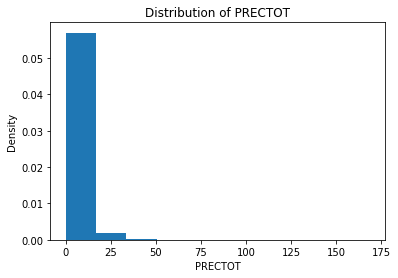

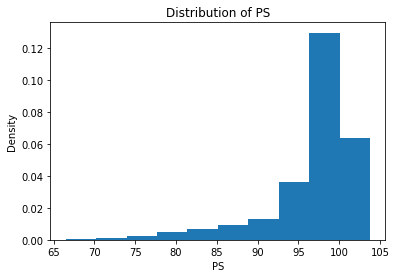

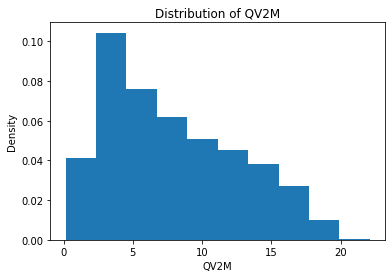

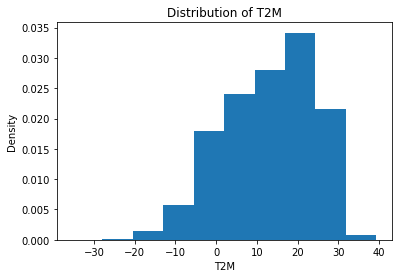

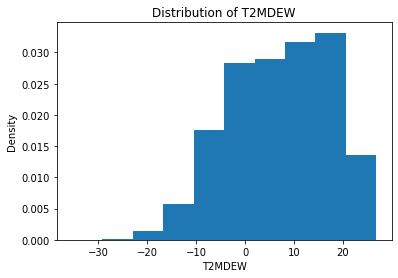

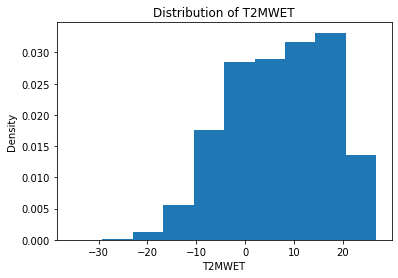

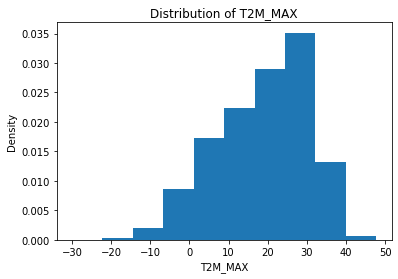

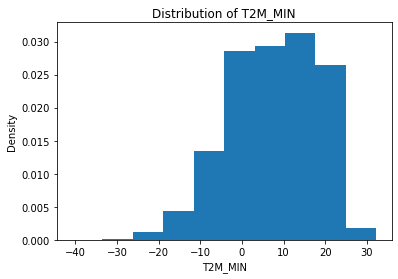

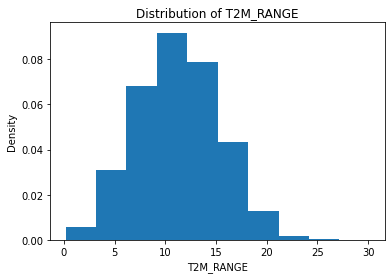

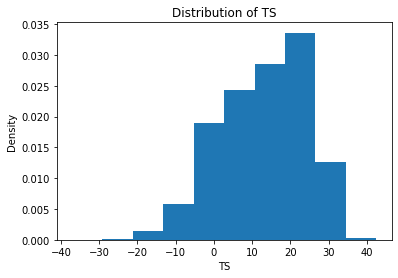

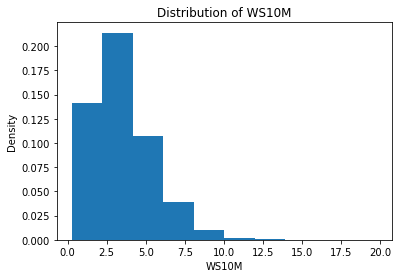

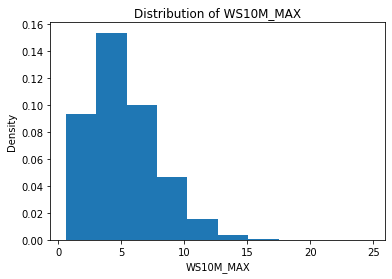

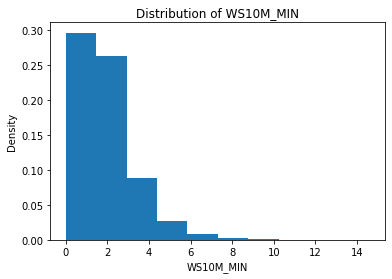

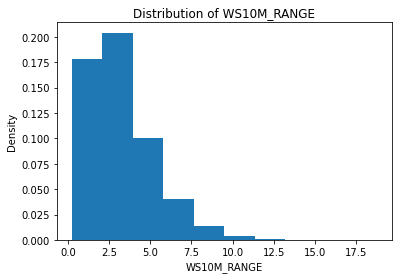

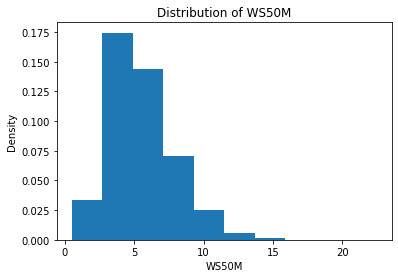

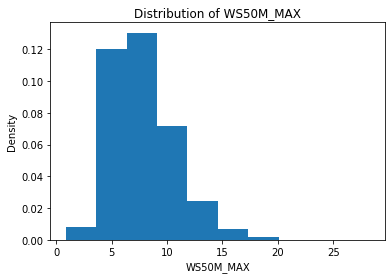

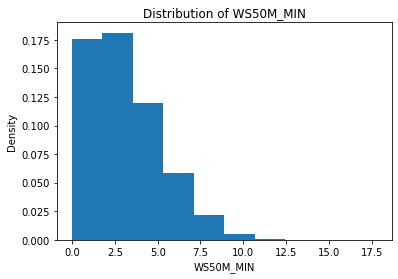

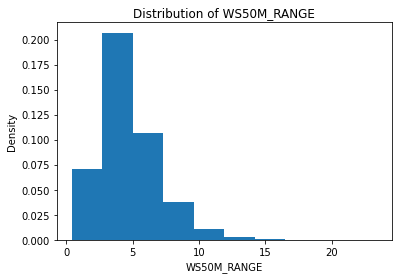

In [ ]:
for col_name in measures_column_list:
    plt.figure()
    plt.hist(drought_df_measures[col_name], density = True)
    x_name = col_name
    plt.xlabel(x_name)
    y_name = 'Density'
    plt.ylabel(y_name)
    plt.title('Distribution of {x_name}'.format(x_name=x_name))

### <font color='darkblue'>Outlier Treatment

#### <font color='blue'>Identifying Outliers

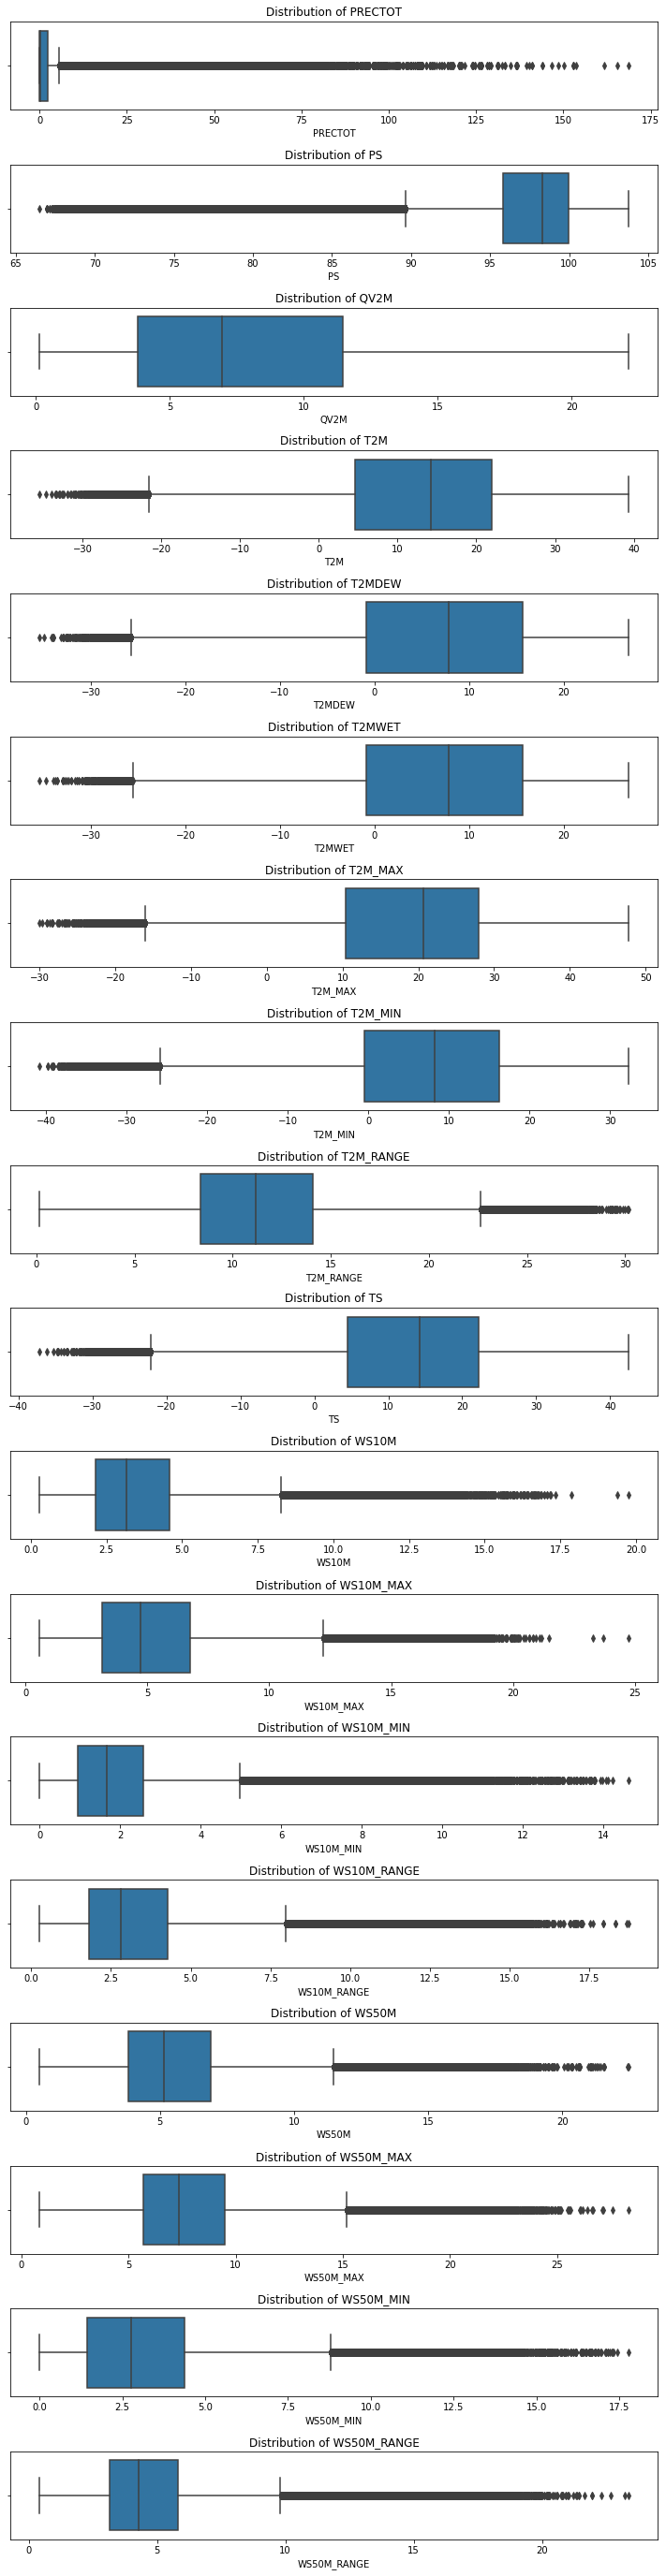

In [ ]:
plt.figure(figsize=(10,40))
for x in (range(1,19)):
    plt.subplot(19,1,x)
    sns.boxplot(x =  drought_df_measures.columns[x-1], data=drought_df_measures)
    x_name = drought_df_measures.columns[x-1]
    plt.title(f'Distribution of {x_name}')         
plt.tight_layout()

In [ ]:
print('Total rows = ',len(drought_df_measures.index))
for i in drought_df_measures.select_dtypes(exclude = ['object']).columns:
    print ('Number of values beyong standard outlier limit in ', i)
    print(len(drought_df_measures[(drought_df_measures[i] > drought_df_measures[i].mean() + 3*drought_df_measures[i].std()) | (drought_df_measures[i] < drought_df_measures[i].mean() - 3*drought_df_measures[i].std())]))

Total rows =  2756796
Number of values beyong standard outlier limit in  PRECTOT
65933
Number of values beyong standard outlier limit in  PS
73197
Number of values beyong standard outlier limit in  QV2M
1
Number of values beyong standard outlier limit in  T2M
4531
Number of values beyong standard outlier limit in  T2MDEW
2023
Number of values beyong standard outlier limit in  T2MWET
1814
Number of values beyong standard outlier limit in  T2M_MAX
3384
Number of values beyong standard outlier limit in  T2M_MIN
6944
Number of values beyong standard outlier limit in  T2M_RANGE
3628
Number of values beyong standard outlier limit in  TS
4762
Number of values beyong standard outlier limit in  WS10M
29954
Number of values beyong standard outlier limit in  WS10M_MAX
23387
Number of values beyong standard outlier limit in  WS10M_MIN
39901
Number of values beyong standard outlier limit in  WS10M_RANGE
35979
Number of values beyong standard outlier limit in  WS50M
23090
Number of values beyong sta

#### <font color='blue'>Removing values beyond the standard outlier limit

In [7]:
drought_df = drought_df[(drought_df['PRECTOT'] <= drought_df['PRECTOT'].mean() + 3*drought_df['PRECTOT'].std()) &
        (drought_df['PRECTOT'] >= drought_df['PRECTOT'].mean() - 3*drought_df['PRECTOT'].std())]

drought_df = drought_df[(drought_df['PS'] <= drought_df['PS'].mean() + 3*drought_df['PS'].std()) &
        (drought_df['PS'] >= drought_df['PS'].mean() - 3*drought_df['PS'].std())]

drought_df = drought_df[(drought_df['QV2M'] <= drought_df['QV2M'].mean() + 3*drought_df['QV2M'].std()) &
        (drought_df['QV2M'] >= drought_df['QV2M'].mean() - 3*drought_df['QV2M'].std())]

drought_df = drought_df[(drought_df['T2M'] <= drought_df['T2M'].mean() + 3*drought_df['T2M'].std()) &
        (drought_df['T2M'] >= drought_df['T2M'].mean() - 3*drought_df['T2M'].std())]

drought_df = drought_df[(drought_df['T2MDEW'] <= drought_df['T2MDEW'].mean() + 3*drought_df['T2MDEW'].std()) &
        (drought_df['T2MDEW'] >= drought_df['T2MDEW'].mean() - 3*drought_df['T2MDEW'].std())]

drought_df = drought_df[(drought_df['T2MWET'] <= drought_df['T2MWET'].mean() + 3*drought_df['T2MWET'].std()) &
        (drought_df['T2MWET'] >= drought_df['T2MWET'].mean() - 3*drought_df['T2MWET'].std())]

drought_df = drought_df[(drought_df['T2M_MAX'] <= drought_df['T2M_MAX'].mean() + 3*drought_df['T2M_MAX'].std()) &
        (drought_df['T2M_MAX'] >= drought_df['T2M_MAX'].mean() - 3*drought_df['T2M_MAX'].std())]

drought_df = drought_df[(drought_df['T2M_MIN'] <= drought_df['T2M_MIN'].mean() + 3*drought_df['T2M_MIN'].std()) &
        (drought_df['T2M_MIN'] >= drought_df['T2M_MIN'].mean() - 3*drought_df['T2M_MIN'].std())]

drought_df = drought_df[(drought_df['T2M_RANGE'] <= drought_df['T2M_RANGE'].mean() + 3*drought_df['T2M_RANGE'].std()) &
        (drought_df['T2M_RANGE'] >= drought_df['T2M_RANGE'].mean() - 3*drought_df['T2M_RANGE'].std())]

drought_df = drought_df[(drought_df['TS'] <= drought_df['TS'].mean() + 3*drought_df['TS'].std()) &
        (drought_df['TS'] >= drought_df['TS'].mean() - 3*drought_df['TS'].std())]

drought_df = drought_df[(drought_df['WS10M'] <= drought_df['WS10M'].mean() + 3*drought_df['WS10M'].std()) &
        (drought_df['WS10M'] >= drought_df['WS10M'].mean() - 3*drought_df['WS10M'].std())]

drought_df = drought_df[(drought_df['WS10M_MAX'] <= drought_df['WS10M_MAX'].mean() + 3*drought_df['WS10M_MAX'].std()) &
        (drought_df['WS10M_MAX'] >= drought_df['WS10M_MAX'].mean() - 3*drought_df['WS10M_MAX'].std())]

drought_df = drought_df[(drought_df['WS10M_MIN'] <= drought_df['WS10M_MIN'].mean() + 3*drought_df['WS10M_MIN'].std()) &
        (drought_df['WS10M_MIN'] >= drought_df['WS10M_MIN'].mean() - 3*drought_df['WS10M_MIN'].std())]

drought_df = drought_df[(drought_df['WS10M_RANGE'] <= drought_df['WS10M_RANGE'].mean() + 3*drought_df['WS10M_RANGE'].std()) &
        (drought_df['WS10M_RANGE'] >= drought_df['WS10M_RANGE'].mean() - 3*drought_df['WS10M_RANGE'].std())]

drought_df = drought_df[(drought_df['WS50M'] <= drought_df['WS50M'].mean() + 3*drought_df['WS50M'].std()) &
        (drought_df['WS50M'] >= drought_df['WS50M'].mean() - 3*drought_df['WS50M'].std())]

drought_df = drought_df[(drought_df['WS50M_MAX'] <= drought_df['WS50M_MAX'].mean() + 3*drought_df['WS50M_MAX'].std()) &
        (drought_df['WS50M_MAX'] >= drought_df['WS50M_MAX'].mean() - 3*drought_df['WS50M_MAX'].std())]

drought_df = drought_df[(drought_df['WS50M_MIN'] <= drought_df['WS50M_MIN'].mean() + 3*drought_df['WS50M_MIN'].std()) &
        (drought_df['WS50M_MIN'] >= drought_df['WS50M_MIN'].mean() - 3*drought_df['WS50M_MIN'].std())]

drought_df = drought_df[(drought_df['WS50M_RANGE'] <= drought_df['WS50M_RANGE'].mean() + 3*drought_df['WS50M_RANGE'].std()) &
        (drought_df['WS50M_RANGE'] >= drought_df['WS50M_RANGE'].mean() - 3*drought_df['WS50M_RANGE'].std())]

print('Total rows = ',len(drought_df.index))

Total rows =  2474338


#### <font color='darkblue'>Univariate Analysis - Distribution of categorical variables

In [8]:
categorical_column_list = ['score','year','month','day']
drought_df_categorical = drought_df[['score','year','month','day']]

<Figure size 720x2880 with 0 Axes>

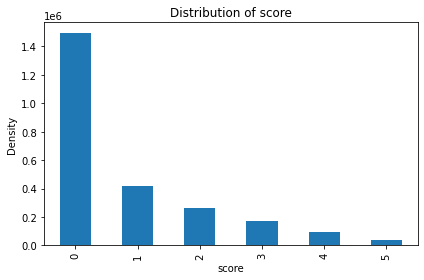

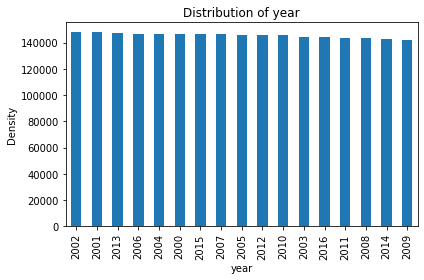

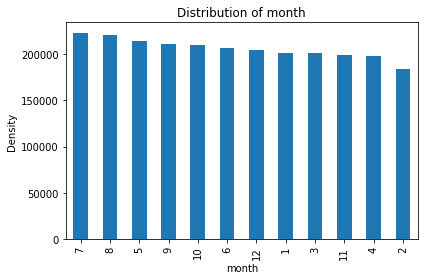

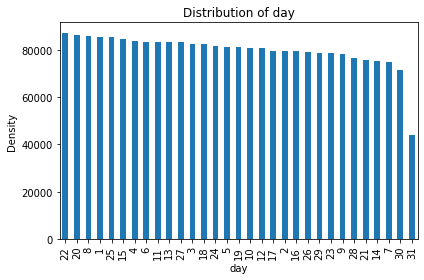

In [ ]:
# Distribution of categorical variables
plt.figure(figsize=(10,40))
for col_name in categorical_column_list:
    plt.figure()
    drought_df_categorical[col_name].value_counts().plot(kind = 'bar')
    x_name = col_name
    y_name = 'Density'
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title('Distribution of {x_name}'.format(x_name=x_name))
    plt.tight_layout()

#### <font color='darkblue'>Bivariate Analysis

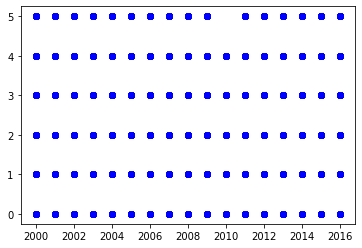

In [ ]:
plt.scatter(drought_df['year'], drought_df['score'], c ="blue")
plt.show()

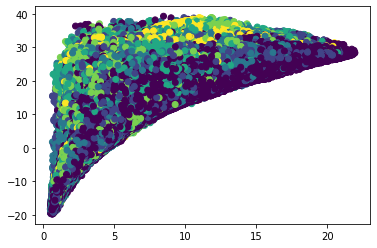

In [ ]:
plt.scatter(drought_df['QV2M'], drought_df['T2M'], c =drought_df['score'])
plt.show()

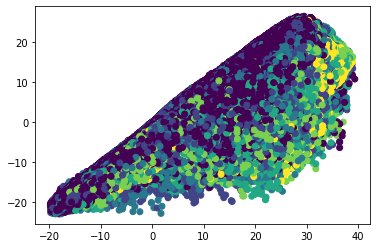

In [ ]:
plt.scatter(drought_df['T2M'], drought_df['T2MDEW'], c =drought_df['score'])
plt.show()

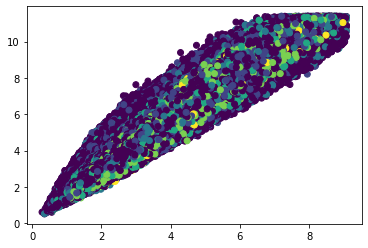

In [ ]:
temp_df = drought_df[drought_df['score']==5]
plt.scatter(drought_df['WS10M'], drought_df['WS50M'], c= drought_df['score'])
plt.show()

In [ ]:
sns.pairplot(drought_df)

#### <font color='darkblue'> Extracting Dependent and Independent Variables

In [9]:
independent_variables = drought_df.drop('score', 1)
independent_variables = independent_variables.drop('fips', 1)
independent_variables = independent_variables.drop('date', 1)
independent_variables.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,...,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,year,month,day
3,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,...,5.67,2.08,3.59,6.73,9.31,3.74,5.58,2000,1,4
10,1.33,100.40,6.63,11.48,7.84,7.84,18.88,5.72,13.16,10.43,...,2.48,1.05,1.43,3.55,6.38,1.71,4.67,2000,1,11
17,1.11,100.39,9.53,14.28,13.26,13.26,18.04,8.98,9.06,14.19,...,3.60,1.67,1.92,5.19,6.40,3.84,2.55,2000,1,18
24,0.00,100.11,2.05,-0.78,-7.93,-7.72,5.65,-5.46,11.11,-0.61,...,4.59,2.28,2.32,5.75,8.03,3.96,4.07,2000,1,25
31,0.00,101.00,3.36,2.06,-1.73,-1.70,11.02,-4.21,15.23,1.88,...,2.74,0.88,1.86,4.18,6.38,1.27,5.11,2000,2,1


In [10]:
target = drought_df['score']
target.head()

3     1
10    2
17    2
24    2
31    1
Name: score, dtype: int64

### <font color='orangered'>Correlation between independent variables for Feature Selection

In [11]:
correlation_plot = drought_df_measures.corr()
correlation_plot.style.background_gradient(cmap = 'RdYlGn')

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
PRECTOT,1.000000,0.068775,0.245081,0.093258,0.231035,0.230975,0.026773,0.144929,-0.304171,0.089598,0.049730,0.060981,0.023346,0.065755,0.069057,0.079508,0.057816,0.047477
PS,0.068775,1.000000,0.282412,0.164160,0.341234,0.341252,0.111979,0.208285,-0.225935,0.163830,-0.080747,-0.135905,0.022932,-0.198332,-0.043315,-0.091821,0.036238,-0.154479
QV2M,0.245081,0.282412,1.000000,0.870242,0.959385,0.960434,0.804338,0.906144,-0.071547,0.862559,-0.225449,-0.256452,-0.108789,-0.269203,-0.205971,-0.249961,-0.081554,-0.246203
T2M,0.093258,0.164160,0.870242,1.000000,0.913530,0.914218,0.983356,0.981629,0.244357,0.997515,-0.207874,-0.220192,-0.125407,-0.209030,-0.193196,-0.206444,-0.112579,-0.159589
T2MDEW,0.231035,0.341234,0.959385,0.913530,1.000000,0.999970,0.854716,0.939934,-0.015643,0.905184,-0.238299,-0.268686,-0.115920,-0.280702,-0.204238,-0.245323,-0.082416,-0.239335
T2MWET,0.230975,0.341252,0.960434,0.914218,0.999970,1.000000,0.855401,0.940629,-0.015500,0.905911,-0.237971,-0.268292,-0.115882,-0.280199,-0.204143,-0.245147,-0.082497,-0.239029
T2M_MAX,0.026773,0.111979,0.804338,0.983356,0.854716,0.855401,1.000000,0.937762,0.407534,0.980101,-0.216764,-0.221671,-0.141911,-0.199614,-0.195727,-0.196236,-0.133234,-0.126331
T2M_MIN,0.144929,0.208285,0.906144,0.981629,0.939934,0.940629,0.937762,1.000000,0.065037,0.979134,-0.206382,-0.225829,-0.112878,-0.225256,-0.197991,-0.225744,-0.096593,-0.200157
T2M_RANGE,-0.304171,-0.225935,-0.071547,0.244357,-0.015643,-0.015500,0.407534,0.065037,1.000000,0.241564,-0.080163,-0.043127,-0.110952,0.018746,-0.041778,0.029737,-0.128844,0.163320
TS,0.089598,0.163830,0.862559,0.997515,0.905184,0.905911,0.980101,0.979134,0.241564,1.000000,-0.189823,-0.202713,-0.110273,-0.196015,-0.180665,-0.193347,-0.102367,-0.152434


#### <font color='darkgreen'>Attributes QV2M,	T2M,	T2MDEW,	T2MWET,	T2M_MAX,	T2M_MIN and TS have shown strong positive correlation

#### <font color='darkgreen'>Similary WS10M,	WS10M_MAX and	WS10M_MIN have shown a strong positve correlation

#### <font color='darkgreen'>Likewise, WS50M,	WS50M_MAX and	WS50M_MIN	show strong positive correlation

#### <font color='darkgreen'>However, from the scatter plots above, we see significant variance between the data points, despite the strong positive correlation. Hence we'll retain all these variables, and try other feature selection methods.

### <font color='orangered'>Splitting into train and test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(independent_variables, target, test_size=0.2, random_state=0)

In [12]:
print("Train features shape", X_train.shape)
print("Train target shape", y_train.shape)
print("Test features shape", X_test.shape)
print("Test target shape", y_test.shape)

Train features shape (1979470, 21)
Train target shape (1979470,)
Test features shape (494868, 21)
Test target shape (494868,)


### <font color='orangered'>Standardizing the data

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 2.39997504, -0.78416609,  0.74119512, ..., -1.42190019,
        -0.16603116,  1.17395993],
       [ 2.44655066,  0.37551891, -0.51918943, ...,  0.61688719,
         1.00794799,  0.26443762],
       [-0.51617644, -0.98505641, -1.00721711, ..., -1.62577893,
         1.30144278, -0.19032353],
       ...,
       [ 2.73117947, -1.01929907, -0.79927488, ...,  0.61688719,
         1.59493757,  1.28765022],
       [ 0.22385845,  0.40519588,  1.29500045, ...,  1.2285234 ,
         0.7144532 , -1.55460699],
       [-0.51617644,  0.75903678,  1.43292132, ..., -1.01414272,
        -0.16603116,  0.94657935]])

### <font color='orangered'>Feature Selection using RFE and Random Forest algorithm

In [14]:
model = RandomForestClassifier(n_estimators=10) # n_estimators is the hyperparameter
rfe = RFE(model, n_features_to_select=15) # n_features_to_select is chosen on a trial and error basis
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
selected_features = independent_variables.columns[(fit.get_support())]
print(selected_features)

Num Features: 15
Selected Features: [False  True  True  True  True False  True  True  True  True  True False
 False  True  True  True False  True  True False  True]
Feature Ranking: [4 1 1 1 1 3 1 1 1 1 1 5 6 1 1 1 2 1 1 7 1]
Index(['PS', 'QV2M', 'T2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS',
       'WS10M', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_RANGE', 'year',
       'day'],
      dtype='object')


In [15]:
independent_variables = independent_variables.drop('PRECTOT', 1)
independent_variables = independent_variables.drop('T2MWET', 1)
independent_variables = independent_variables.drop('WS10M_MAX', 1)
independent_variables = independent_variables.drop('WS10M_MIN', 1)
independent_variables = independent_variables.drop('WS50M_MIN', 1)
independent_variables = independent_variables.drop('month', 1)
independent_variables.head()

X_train, X_test, y_train, y_test = train_test_split(independent_variables, target, test_size=0.2, random_state=0)

print("Train features shape", X_train.shape)
print("Train target shape", y_train.shape)
print("Test features shape", X_test.shape)
print("Test target shape", y_test.shape)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Train features shape (1979470, 15)
Train target shape (1979470,)
Test features shape (494868, 15)
Test target shape (494868,)


### <font color='orangered'>Fixing class imbalance

#### <font color='purple'>Upsampling using SMOTE

In [16]:
sm = SMOTE(random_state = 5)
X_train_ures_SMOTE, y_train_ures_SMOTE = sm.fit_resample(X_train, y_train.ravel())

In [17]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After OverSampling, the shape of train_X: {}'.format(X_train_ures_SMOTE.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ures_SMOTE.shape))

print("Counts of label '0' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 0),sum(y_train_ures_SMOTE == 0)))
print("Counts of label '1' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 1),sum(y_train_ures_SMOTE == 1)))
print("Counts of label '2' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 2),sum(y_train_ures_SMOTE == 2)))
print("Counts of label '3' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 3),sum(y_train_ures_SMOTE == 3)))
print("Counts of label '4' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 4),sum(y_train_ures_SMOTE == 4)))
print("Counts of label '5' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 5),sum(y_train_ures_SMOTE == 5)))

Before OverSampling, the shape of train_X: (1979470, 15)
Before OverSampling, the shape of train_y: (1979470,) 

After OverSampling, the shape of train_X: (7173186, 15)
After OverSampling, the shape of train_y: (7173186,) 

Counts of label '0' - Before Oversampling:1195531, After OverSampling: 1195531
Counts of label '1' - Before Oversampling:332490, After OverSampling: 1195531
Counts of label '2' - Before Oversampling:209363, After OverSampling: 1195531
Counts of label '3' - Before Oversampling:139009, After OverSampling: 1195531
Counts of label '4' - Before Oversampling:74270, After OverSampling: 1195531
Counts of label '5' - Before Oversampling:28807, After OverSampling: 1195531


#### <font color='purple'>Downsampling using Neighborhood Cleaning Rule

In [18]:
undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
X_train_dres, y_train_dres = undersample.fit_resample(X_train, y_train)

In [19]:
print('Before UnderSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(X_train_dres.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres == 1)))
print("Counts of label '2' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 2),sum(y_train_dres == 2)))
print("Counts of label '3' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 3),sum(y_train_dres == 3)))
print("Counts of label '4' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 4),sum(y_train_dres == 4)))
print("Counts of label '5' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 5),sum(y_train_dres == 5)))

Before UnderSampling, the shape of train_X: (1979470, 15)
Before UnderSampling, the shape of train_y: (1979470,) 

After UnderSampling, the shape of train_X: (1568629, 15)
After UnderSampling, the shape of train_y: (1568629,) 

Counts of label '0' - Before UnderSampling:1195531, After UnderSampling: 1113612
Counts of label '1' - Before UnderSampling:332490, After UnderSampling: 199977
Counts of label '2' - Before UnderSampling:209363, After UnderSampling: 113685
Counts of label '3' - Before UnderSampling:139009, After UnderSampling: 73890
Counts of label '4' - Before UnderSampling:74270, After UnderSampling: 38658
Counts of label '5' - Before UnderSampling:28807, After UnderSampling: 28807


#### <font color='purple'>Downsampling using Near Miss

In [20]:
undersample = NearMiss()
X_train_dres_nm, y_train_dres_nm = undersample.fit_resample(X_train, y_train)

In [21]:
print('Before UnderSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(X_train_dres_nm.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres_nm.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres_nm == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres_nm == 1)))
print("Counts of label '2' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 2),sum(y_train_dres_nm == 2)))
print("Counts of label '3' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 3),sum(y_train_dres_nm == 3)))
print("Counts of label '4' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 4),sum(y_train_dres_nm == 4)))
print("Counts of label '5' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 5),sum(y_train_dres_nm == 5)))

Before UnderSampling, the shape of train_X: (1979470, 15)
Before UnderSampling, the shape of train_y: (1979470,) 

After UnderSampling, the shape of train_X: (172842, 15)
After UnderSampling, the shape of train_y: (172842,) 

Counts of label '0' - Before UnderSampling:1195531, After UnderSampling: 28807
Counts of label '1' - Before UnderSampling:332490, After UnderSampling: 28807
Counts of label '2' - Before UnderSampling:209363, After UnderSampling: 28807
Counts of label '3' - Before UnderSampling:139009, After UnderSampling: 28807
Counts of label '4' - Before UnderSampling:74270, After UnderSampling: 28807
Counts of label '5' - Before UnderSampling:28807, After UnderSampling: 28807


### <font color='orangered'>PCA for dimensionality reduction

#### <font color='purple'>PCA on Near miss Downsampled Data

In [22]:
pca = PCA()
X_train_dres_nm_PCAreduced = pca.fit_transform(X_train_dres_nm)
X_test_NM_PCA_transformed = pca.transform(X_test)

In [23]:
print(pca.explained_variance_ratio_)

[4.39760721e-01 2.06554074e-01 9.20985742e-02 8.38908079e-02
 6.15225086e-02 4.90846601e-02 4.29803961e-02 1.13563716e-02
 7.51220366e-03 2.25102252e-03 1.50262743e-03 1.06647500e-03
 3.46162832e-04 7.33860529e-05 8.85472048e-09]


In [24]:
# choosing n value that explains >90% variance
pca = PCA(n_components=5)
X_train_dres_nm_PCAreduced = pca.fit_transform(X_train_dres_nm)
X_test_NM_PCA_transformed = pca.transform(X_test)

In [25]:
print(pca.explained_variance_ratio_)

[0.43976072 0.20655407 0.09209857 0.08389081 0.06152251]


#### <font color='purple'>PCA on SMOTE Upsampled Data

In [26]:
pca = PCA()
X_train_ures_SMOTE_PCAreduced = pca.fit_transform(X_train_ures_SMOTE)
X_test_SMOTE_PCA_transformed = pca.transform(X_test)

In [27]:
print(pca.explained_variance_ratio_)

[4.01947710e-01 2.23673611e-01 1.09509945e-01 6.43128546e-02
 6.35497118e-02 6.02121410e-02 5.14722685e-02 1.16854122e-02
 8.25314597e-03 2.35653307e-03 1.53943482e-03 1.05901039e-03
 3.59881822e-04 6.83351075e-05 4.98695519e-09]


In [28]:
# choosing n value that explains >90% variance
pca = PCA(n_components=5)
X_train_ures_SMOTE_PCAreduced = pca.fit_transform(X_train_ures_SMOTE)
X_test_SMOTE_PCA_transformed = pca.transform(X_test)

In [29]:
print(pca.explained_variance_ratio_)

[0.40194771 0.22367361 0.10950995 0.06431285 0.06354971]


#### <font color='purple'>Polynomial Kernel PCA with degree 3 on Near miss Downsampled Data

In [ ]:
poly_kpca = KernelPCA(kernel='poly')
X_train_dres_nm_polykPCAreduced = poly_kpca.fit_transform(X_train_dres_nm)
X_test_NM_polykPCA_transformed = poly_kpca.transform(X_test)

In [ ]:
print(poly_kpca.explained_variance_ratio_)

#### <font color='purple'>Polynomial Kernel PCA with degree 3 on SMOTE Upsampled Data

In [ ]:
poly_kpca = KernelPCA(kernel='poly')
X_train_ures_SMOTE_polykPCAreduced = poly_kpca.fit_transform(X_train_ures_SMOTE)
X_test_SMOTE_polykPCA_transformed = poly_kpca.transform(X_test)

In [ ]:
print(poly_kpca.explained_variance_ratio_)

#### <font color='purple'>Polynomial Kernel PCA with degree 3 on Original Data

In [ ]:
poly_kpca = KernelPCA(kernel='poly')
X_train_polykPCAreduced = poly_kpca.fit_transform(X_train)
X_test_polykPCA_transformed = poly_kpca.transform(X_test)

In [ ]:
print(poly_kpca.explained_variance_ratio_)

### <font color='orangered'>LDA For Dimensionality Reduction

#### <font color='purple'>LDA on Near Miss Downsampled Data

In [30]:
lda=LDA(n_components=5)
X_train_dres_nm_LDAreduced=lda.fit_transform(X_train_dres_nm,y_train_dres_nm)
X_test_NM_LDA_transformed=lda.transform(X_test)

In [31]:
print("Train features shape", X_train.shape)
print("LDA Dimensionality reduced features shape on Near Miss downsampled data", X_train_dres_nm_LDAreduced.shape)
print("LDA Dimensionality reduced features shape on test data", X_test_NM_LDA_transformed.shape)

Train features shape (1979470, 15)
LDA Dimensionality reduced features shape on Near Miss downsampled data (172842, 5)
LDA Dimensionality reduced features shape on test data (494868, 5)


#### <font color='purple'>LDA on SMOTE Upsampled Data

In [32]:
lda=LDA(n_components=5)
X_train_ures_SMOTE_LDAreduced=lda.fit_transform(X_train_ures_SMOTE,y_train_ures_SMOTE)
X_test_SMOTE_LDA_transformed=lda.transform(X_test)

In [33]:
print("Train features shape", X_train.shape)
print("LDA Dimensionality reduced features shape on SMOTE Upsampled data", X_train_ures_SMOTE_LDAreduced.shape)
print("LDA Dimensionality reduced features shape on test data", X_test_NM_LDA_transformed.shape)

Train features shape (1979470, 15)
LDA Dimensionality reduced features shape on SMOTE Upsampled data (7173186, 5)
LDA Dimensionality reduced features shape on test data (494868, 5)


### <font color='orangered'>Model Development

#### <font color='purple'>Decision Tree Algorithm with Near Miss Downsampling

In [34]:
DT_classifier_NM = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier_NM.fit(X_train_dres_nm,y_train_dres_nm)
y_pred_NM = DT_classifier_NM.predict(X_test)

In [35]:
print('Performance of Decision Tree Algorithm with Near Miss Downsampling:\n')
print(confusion_matrix(y_test, y_pred_NM))
print(classification_report(y_test, y_pred_NM))
print('Accuracy:',accuracy_score(y_test, y_pred_NM))
print('Precision:',precision_score(y_test, y_pred_NM, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_NM, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_NM, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_NM))

Performance of Decision Tree Algorithm with Near Miss Downsampling:

[[57978 54923 56734 51002 36174 42434]
 [ 9145 18249 16327 14854 11038 13453]
 [ 3608  7190 12949 11109  7816  9877]
 [ 1675  3118  5496 10484  6327  7393]
 [  586   978  1717  3425  6798  4916]
 [   79   143   236   431  1415  4791]]
              precision    recall  f1-score   support

           0       0.79      0.19      0.31    299245
           1       0.22      0.22      0.22     83066
           2       0.14      0.25      0.18     52549
           3       0.11      0.30      0.17     34493
           4       0.10      0.37      0.15     18420
           5       0.06      0.68      0.11      7095

    accuracy                           0.22    494868
   macro avg       0.24      0.33      0.19    494868
weighted avg       0.54      0.22      0.26    494868

Accuracy: 0.22480540265282864
Precision: 0.5431846016633978
Recall: 0.22480540265282864
F1 Score: 0.2626001987113276
Cohen Kappa Score: 0.078759570914181

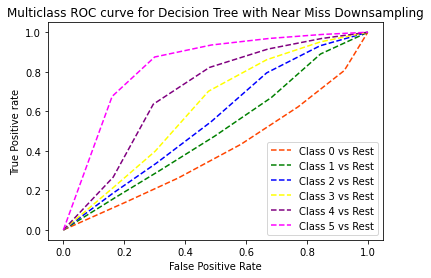

In [40]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_NM, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with Near Miss Downsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with Near Miss Downsampling',dpi=300)

#### <font color='purple'>Decision Tree Algorithm with Near Miss Downsampling - Hyperparameter Tuning

In [37]:
params = {
          'max_depth': [3, 5, 10, 20],
          'min_samples_leaf': [10, 20, 50, 100],
          'max_features':['log2','sqrt',None]
}

In [38]:
grid_search_DT_NM = GridSearchCV(estimator=DT_classifier_NM, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [39]:
%%time
grid_search_DT_NM.fit(X_train_dres_nm,y_train_dres_nm)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
CPU times: user 2.62 s, sys: 392 ms, total: 3.01 s
Wall time: 19.2 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20],
                         'max_features': ['log2', 'sqrt', None],
                         'min_samples_leaf': [10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [41]:
score_df = pd.DataFrame(grid_search_DT_NM.cv_results_)
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
44,2.240344,0.018680,0.011984,0.002401,20,None,10,"{'max_depth': 20, 'max_features': None, 'min_s...",0.368818,0.411654,0.409465,0.385744,0.393921,0.017700,1
45,2.122495,0.017101,0.011355,0.001028,20,None,20,"{'max_depth': 20, 'max_features': None, 'min_s...",0.362639,0.412488,0.402384,0.380653,0.389541,0.019327,2
46,1.902360,0.014383,0.007797,0.000515,20,None,50,"{'max_depth': 20, 'max_features': None, 'min_s...",0.355534,0.397214,0.388822,0.365216,0.376697,0.016938,3
47,1.747380,0.028422,0.009207,0.002327,20,None,100,"{'max_depth': 20, 'max_features': None, 'min_s...",0.347527,0.383976,0.376140,0.348947,0.364148,0.016158,4
40,0.500440,0.010687,0.010417,0.001693,20,sqrt,10,"{'max_depth': 20, 'max_features': 'sqrt', 'min...",0.336118,0.371294,0.365471,0.341541,0.353606,0.015042,5


#### <font color='purple'>Decision Tree Algorithm with SMOTE Upsampling

In [42]:
DT_classifier_SMOTE = tree.DecisionTreeClassifier(criterion='gini', max_depth=70)
DT_classifier_SMOTE.fit(X_train_ures_SMOTE,y_train_ures_SMOTE)
y_pred_SMOTE = DT_classifier_SMOTE.predict(X_test)

In [43]:
print('Performance of Decision Tree Algorithm with SMOTE Upsampling:\n')
print(confusion_matrix(y_test, y_pred_SMOTE))
print(classification_report(y_test, y_pred_SMOTE))
print('Accuracy:',accuracy_score(y_test, y_pred_SMOTE))
print('Precision:',precision_score(y_test, y_pred_SMOTE, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_SMOTE, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_SMOTE, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_SMOTE))

Performance of Decision Tree Algorithm with SMOTE Upsampling:

[[262370  23302   7324   3789   1821    639]
 [ 18452  50659  10011   2554   1068    322]
 [  4135  10129  29929   6574   1411    371]
 [  1839   2020   6551  19821   3738    524]
 [   655    627   1059   3853  10754   1472]
 [   186    154    208    385   1503   4659]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89    299245
           1       0.58      0.61      0.60     83066
           2       0.54      0.57      0.56     52549
           3       0.54      0.57      0.55     34493
           4       0.53      0.58      0.56     18420
           5       0.58      0.66      0.62      7095

    accuracy                           0.76    494868
   macro avg       0.61      0.65      0.63    494868
weighted avg       0.77      0.76      0.77    494868

Accuracy: 0.7642280365673271
Precision: 0.7725880165635359
Recall: 0.7642280365673271
F1 Score: 0.7679865604188995
Cohen Ka

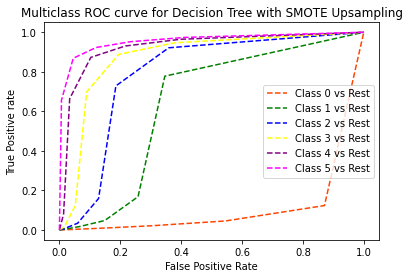

In [44]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_SMOTE, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with SMOTE Upsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with SMOTE Upsampling',dpi=300)

#### <font color='purple'>Decision Tree Algorithm with Near Miss Downsampling and PCA

In [45]:
DT_classifier_NM_PCA = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier_NM_PCA.fit(X_train_dres_nm_PCAreduced,y_train_dres_nm)
y_pred_NM_PCA = DT_classifier_NM_PCA.predict(X_test_NM_PCA_transformed)

In [46]:
print('Performance of Decision Tree Algorithm with Near Miss Downsampling and PCA:\n')
print(confusion_matrix(y_test, y_pred_NM_PCA))
print(confusion_matrix(y_test, y_pred_NM_PCA))
print(classification_report(y_test, y_pred_NM_PCA))
print('Accuracy:',accuracy_score(y_test, y_pred_NM_PCA))
print('Precision:',precision_score(y_test, y_pred_NM_PCA, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_NM_PCA, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_NM_PCA, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_NM_PCA))

Performance of Decision Tree Algorithm with Near Miss Downsampling and PCA:

[[46463 43588 48568 49155 49004 62467]
 [ 8204 14980 13766 13715 13681 18720]
 [ 3779  6103 11635  9637  8764 12631]
 [ 1977  2897  5156  9356  6457  8650]
 [  749  1092  1729  3318  6638  4894]
 [  156   240   356   510  1367  4466]]
[[46463 43588 48568 49155 49004 62467]
 [ 8204 14980 13766 13715 13681 18720]
 [ 3779  6103 11635  9637  8764 12631]
 [ 1977  2897  5156  9356  6457  8650]
 [  749  1092  1729  3318  6638  4894]
 [  156   240   356   510  1367  4466]]
              precision    recall  f1-score   support

           0       0.76      0.16      0.26    299245
           1       0.22      0.18      0.20     83066
           2       0.14      0.22      0.17     52549
           3       0.11      0.27      0.16     34493
           4       0.08      0.36      0.13     18420
           5       0.04      0.63      0.08      7095

    accuracy                           0.19    494868
   macro avg       

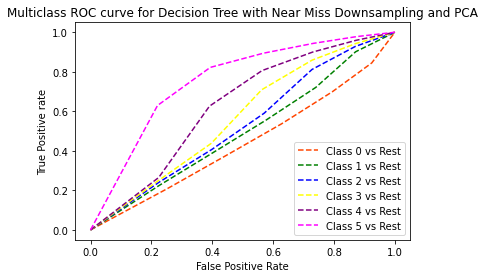

In [47]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_NM_PCA, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with Near Miss Downsampling and PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with Near Miss Downsampling and PCA',dpi=300)

#### <font color='purple'>Decision Tree Algorithm with SMOTE Upsampling and PCA

In [48]:
DT_classifier_SMOTE_PCA = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier_SMOTE_PCA.fit(X_train_ures_SMOTE_PCAreduced,y_train_ures_SMOTE)
y_pred_SMOTE_PCA = DT_classifier_SMOTE_PCA.predict(X_test_SMOTE_PCA_transformed)

In [49]:
print('Performance of Decision Tree Algorithm with SMOTE Upsampling and PCA:\n')
print(confusion_matrix(y_test, y_pred_SMOTE_PCA))
print(confusion_matrix(y_test, y_pred_SMOTE_PCA))
print(classification_report(y_test, y_pred_SMOTE_PCA))
print('Accuracy:',accuracy_score(y_test, y_pred_SMOTE_PCA))
print('Precision:',precision_score(y_test, y_pred_SMOTE_PCA, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_SMOTE_PCA, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_SMOTE_PCA, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_SMOTE_PCA))

Performance of Decision Tree Algorithm with SMOTE Upsampling and PCA:

[[236899  29325  14977   9848   5707   2489]
 [ 18576  46499  10676   4237   2190    888]
 [  5811   9963  27197   6786   2072    720]
 [  2878   2732   6599  17762   3746    776]
 [  1239   1031   1466   3610   9632   1442]
 [   476    318    388    479   1391   4043]]
[[236899  29325  14977   9848   5707   2489]
 [ 18576  46499  10676   4237   2190    888]
 [  5811   9963  27197   6786   2072    720]
 [  2878   2732   6599  17762   3746    776]
 [  1239   1031   1466   3610   9632   1442]
 [   476    318    388    479   1391   4043]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.84    299245
           1       0.52      0.56      0.54     83066
           2       0.44      0.52      0.48     52549
           3       0.42      0.51      0.46     34493
           4       0.39      0.52      0.45     18420
           5       0.39      0.57      0.46      7095

    acc

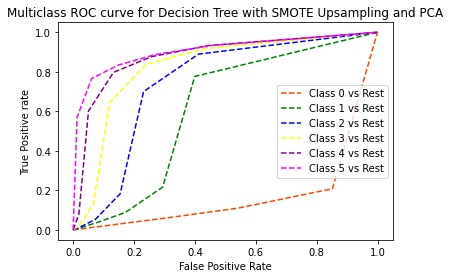

In [50]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_SMOTE_PCA, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with SMOTE Upsampling and PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with SMOTE Upsampling and PCA',dpi=300)

#### <font color='purple'>Decision Tree Algorithm with Near Miss Downsampling and LDA

In [51]:
DT_classifier_NM_LDA = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier_NM_LDA.fit(X_train_dres_nm_LDAreduced,y_train_dres_nm)
y_pred_NM_LDA = DT_classifier_NM_LDA.predict(X_test_NM_LDA_transformed)

In [52]:
print('Performance of Decision Tree Algorithm with Near Miss Downsampling and LDA:\n')
print(confusion_matrix(y_test, y_pred_NM_LDA))
print(confusion_matrix(y_test, y_pred_NM_LDA))
print(classification_report(y_test, y_pred_NM_LDA))
print('Accuracy:',accuracy_score(y_test, y_pred_NM_LDA))
print('Precision:',precision_score(y_test, y_pred_NM_LDA, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_NM_LDA, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_NM_LDA, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_NM_LDA))

Performance of Decision Tree Algorithm with Near Miss Downsampling and LDA:

[[57951 46342 47804 48962 46228 51958]
 [10558 14341 13218 13752 14017 17180]
 [ 4842  6444 10338  9373  9023 12529]
 [ 2408  2990  4835  8387  6563  9310]
 [  815  1206  1808  3082  6118  5391]
 [  213   280   450   663  1301  4188]]
[[57951 46342 47804 48962 46228 51958]
 [10558 14341 13218 13752 14017 17180]
 [ 4842  6444 10338  9373  9023 12529]
 [ 2408  2990  4835  8387  6563  9310]
 [  815  1206  1808  3082  6118  5391]
 [  213   280   450   663  1301  4188]]
              precision    recall  f1-score   support

           0       0.75      0.19      0.31    299245
           1       0.20      0.17      0.19     83066
           2       0.13      0.20      0.16     52549
           3       0.10      0.24      0.14     34493
           4       0.07      0.33      0.12     18420
           5       0.04      0.59      0.08      7095

    accuracy                           0.20    494868
   macro avg       

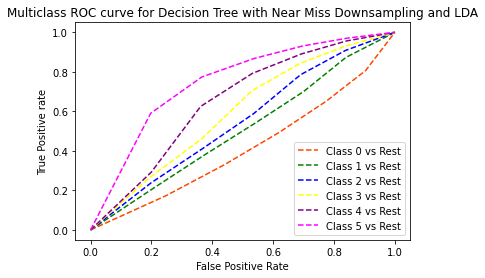

In [53]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_NM_LDA, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with Near Miss Downsampling and LDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with Near Miss Downsampling and LDA',dpi=300)

#### <font color='purple'>Decision Tree Algorithm with SMOTE Upsampling and LDA

In [54]:
DT_classifier_SMOTE_LDA = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier_SMOTE_LDA.fit(X_train_ures_SMOTE_LDAreduced,y_train_ures_SMOTE)
y_pred_SMOTE_LDA = DT_classifier_SMOTE_LDA.predict(X_test_SMOTE_LDA_transformed)

In [55]:
print('Performance of Decision Tree Algorithm with SMOTE Upsampling and LDA:\n')
print(confusion_matrix(y_test, y_pred_SMOTE_LDA))
print(confusion_matrix(y_test, y_pred_SMOTE_LDA))
print(classification_report(y_test, y_pred_SMOTE_LDA))
print('Accuracy:',accuracy_score(y_test, y_pred_SMOTE_LDA))
print('Precision:',precision_score(y_test, y_pred_SMOTE_LDA, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_SMOTE_LDA, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_SMOTE_LDA, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_SMOTE_LDA))

Performance of Decision Tree Algorithm with SMOTE Upsampling and LDA:

[[205872  36992  23713  17035  10646   4987]
 [ 17847  40990  11683   6462   4173   1911]
 [  6156  10048  24117   7214   3454   1560]
 [  3381   3538   6497  15466   4220   1391]
 [  1418   1622   1843   3571   8404   1562]
 [   491    501    584    760   1297   3462]]
[[205872  36992  23713  17035  10646   4987]
 [ 17847  40990  11683   6462   4173   1911]
 [  6156  10048  24117   7214   3454   1560]
 [  3381   3538   6497  15466   4220   1391]
 [  1418   1622   1843   3571   8404   1562]
 [   491    501    584    760   1297   3462]]
              precision    recall  f1-score   support

           0       0.88      0.69      0.77    299245
           1       0.44      0.49      0.46     83066
           2       0.35      0.46      0.40     52549
           3       0.31      0.45      0.36     34493
           4       0.26      0.46      0.33     18420
           5       0.23      0.49      0.32      7095

    acc

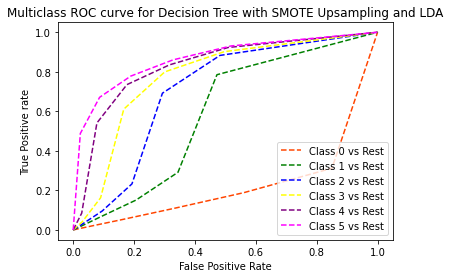

In [56]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_SMOTE_LDA, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with SMOTE Upsampling and LDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with SMOTE Upsampling and LDA',dpi=300)

#### <font color='purple'>Decision Tree Algorithm withot resampling

In [57]:
DT_classifier = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier.fit(X_train,y_train)
y_pred_DT = DT_classifier.predict(X_test)

In [58]:
print('Performance of Decision Tree Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_DT))
print(classification_report(y_test, y_pred_DT))
print('Accuracy:',accuracy_score(y_test, y_pred_DT))
print('Precision:',precision_score(y_test, y_pred_DT, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_DT, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_DT, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_DT))

Performance of Decision Tree Algorithm without resampling:

[[268194  20575   5927   2916   1233    400]
 [ 21882  48519   9326   2278    815    246]
 [  6145  10487  28486   5924   1194    313]
 [  2871   2436   6913  18417   3381    475]
 [  1208    875   1329   3876   9800   1332]
 [   415    228    287    469   1485   4211]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89    299245
           1       0.58      0.58      0.58     83066
           2       0.54      0.54      0.54     52549
           3       0.54      0.53      0.54     34493
           4       0.55      0.53      0.54     18420
           5       0.60      0.59      0.60      7095

    accuracy                           0.76    494868
   macro avg       0.62      0.61      0.62    494868
weighted avg       0.76      0.76      0.76    494868

Accuracy: 0.7630863179676196
Precision: 0.7620663055700817
Recall: 0.7630863179676196
F1 Score: 0.7625650292902717
Cohen Kappa

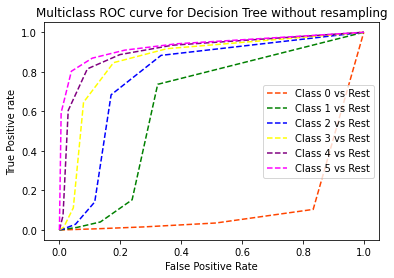

In [59]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_DT, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree without resampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree without resampling',dpi=300)

#### <font color='purple'>Decision Tree Algorithm without resampling  - Hyperparameter Tuning

In [60]:
DT_classifier.get_depth()

51

In [61]:
params = {
          'max_depth': [40, 50, 60, 70, 80],
#           'max_samples_leaf': [, 20, 50, 100],
          'max_features':['log2','sqrt',None]
}

In [62]:
grid_search = GridSearchCV(estimator=DT_classifier, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [63]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits
CPU times: user 37.3 s, sys: 1.33 s, total: 38.7 s
Wall time: 3min 53s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [40, 50, 60, 70, 80],
                         'max_features': ['log2', 'sqrt', None]},
             scoring='accuracy', verbose=1)

In [64]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
5,48.102163,0.441160,0.839826,0.298852,50,None,"{'max_depth': 50, 'max_features': None}",0.738334,0.737973,0.737287,0.737922,0.737879,0.000377,1
2,51.394499,1.034162,0.779184,0.100683,40,None,"{'max_depth': 40, 'max_features': None}",0.738585,0.737940,0.737156,0.737570,0.737813,0.000525,2
11,43.569659,0.317418,0.467472,0.079975,70,None,"{'max_depth': 70, 'max_features': None}",0.738587,0.737544,0.737616,0.737455,0.737801,0.000458,3
14,31.693451,0.391442,0.271972,0.022870,80,None,"{'max_depth': 80, 'max_features': None}",0.738055,0.738288,0.737257,0.737384,0.737746,0.000436,4
8,45.376687,0.071107,0.524549,0.020522,60,None,"{'max_depth': 60, 'max_features': None}",0.738395,0.737603,0.737263,0.737622,0.737721,0.000415,5


#### <font color='purple'>Decision Tree Algorithm without resampling - Setting the right hyperparameters

In [65]:
DT_classifier = tree.DecisionTreeClassifier(criterion='gini', max_depth=70)
DT_classifier.fit(X_train,y_train)
y_pred_DT = DT_classifier.predict(X_test)

In [66]:
print('Performance of Decision Tree Algorithm without resampling - After Hyperparameter Tuning:\n')
print(confusion_matrix(y_test, y_pred_DT))
print(classification_report(y_test, y_pred_DT))
print('Accuracy:',accuracy_score(y_test, y_pred_DT))
print('Precision:',precision_score(y_test, y_pred_DT, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_DT, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_DT, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_DT))

Performance of Decision Tree Algorithm without resampling - After Hyperparameter Tuning:

[[268278  20632   5843   2855   1238    399]
 [ 21825  48580   9309   2258    863    231]
 [  6146  10423  28477   5967   1238    298]
 [  2889   2405   6931  18435   3361    472]
 [  1176    890   1345   3905   9779   1325]
 [   421    219    319    451   1483   4202]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89    299245
           1       0.58      0.58      0.58     83066
           2       0.55      0.54      0.54     52549
           3       0.54      0.53      0.54     34493
           4       0.54      0.53      0.54     18420
           5       0.61      0.59      0.60      7095

    accuracy                           0.76    494868
   macro avg       0.62      0.61      0.62    494868
weighted avg       0.76      0.76      0.76    494868

Accuracy: 0.76333688983729
Precision: 0.7623049559359242
Recall: 0.76333688983729
F1 Score: 0.76

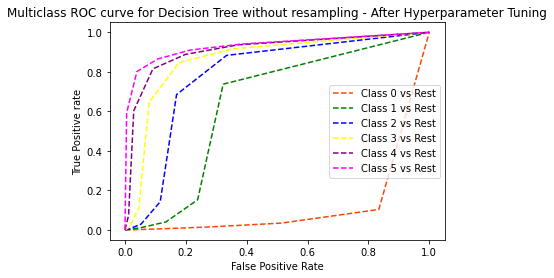

In [67]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_DT, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree without resampling - After Hyperparameter Tuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree without resampling - After Hyperparameter Tuning',dpi=300)

#### <font color='darkblue'>KNN Algorithm without resampling

In [68]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

In [69]:
print('Performance of KNN Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('Precision:',precision_score(y_test, y_pred_knn, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn))

Performance of KNN Algorithm without resampling:

[[279686  14607   2814   1356    605    177]
 [ 28381  45507   7217   1372    464    125]
 [ 10156  10731  25771   4916    801    174]
 [  5048   2682   6777  17002   2731    253]
 [  2394    906   1447   3743   8833   1097]
 [   753    272    328    460   1412   3870]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89    299245
           1       0.61      0.55      0.58     83066
           2       0.58      0.49      0.53     52549
           3       0.59      0.49      0.54     34493
           4       0.59      0.48      0.53     18420
           5       0.68      0.55      0.61      7095

    accuracy                           0.77    494868
   macro avg       0.65      0.58      0.61    494868
weighted avg       0.76      0.77      0.76    494868

Accuracy: 0.7692334117380797
Precision: 0.7550380350070923
Recall: 0.7692334117380797
F1 Score: 0.7597991642138022
Cohen Kappa Score: 0.

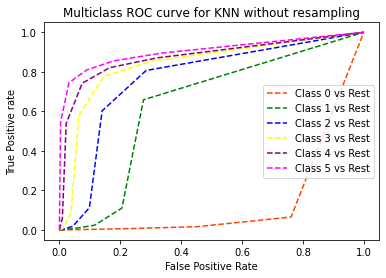

In [70]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_knn, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN without resampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN without resampling',dpi=300)

#### <font color='darkblue'>KNN Algorithm without resampling  - Hyperparameter Tuning

In [71]:
k_range = list(range(1, 10))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn_classifier, param_grid, cv=3, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [72]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.373930,0.146069,84.797933,0.319713,1,{'n_neighbors': 1},0.775114,0.776296,0.775311,0.775574,0.000517,1
1,3.142950,0.093728,142.033989,0.795788,2,{'n_neighbors': 2},0.759784,0.760896,0.760086,0.760256,0.000470,2
2,3.266874,0.026831,185.844760,3.530151,3,{'n_neighbors': 3},0.753792,0.754166,0.753611,0.753856,0.000231,3
3,3.157452,0.090973,252.093555,51.003624,4,{'n_neighbors': 4},0.750108,0.751477,0.751203,0.750929,0.000592,4
4,3.184427,0.117608,943.655544,517.070945,5,{'n_neighbors': 5},0.746305,0.747009,0.746715,0.746677,0.000289,5


#### <font color='darkblue'>KNN Algorithm without resampling - Setting the right hyperparameters

In [82]:
knn_classifier = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

In [83]:
print('Performance of KNN Algorithm without resampling - After Hyperparameter Tuning:\n')
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('Precision:',precision_score(y_test, y_pred_knn, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn))

Performance of KNN Algorithm without resampling - After Hyperparameter Tuning:

[[274955  17897   3679   1736    783    195]
 [ 17979  52980   9755   1674    524    154]
 [  3891   9870  31155   6496    948    189]
 [  1913   1611   6503  20421   3712    333]
 [   824    528    945   3655  10969   1499]
 [   234    147    192    330   1445   4747]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92    299245
           1       0.64      0.64      0.64     83066
           2       0.60      0.59      0.59     52549
           3       0.60      0.59      0.59     34493
           4       0.60      0.60      0.60     18420
           5       0.67      0.67      0.67      7095

    accuracy                           0.80    494868
   macro avg       0.67      0.67      0.67    494868
weighted avg       0.80      0.80      0.80    494868

Accuracy: 0.7986513575337262
Precision: 0.7982935187700809
Recall: 0.7986513575337262
F1 Score: 0.79847104

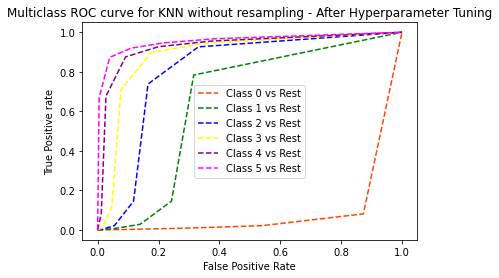

In [75]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_knn, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN without resampling - After Hyperparameter Tuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN without resampling - After Hyperparameter Tuning',dpi=300)

#### <font color='darkblue'>KNN Algorithm with SMOTE upsampling

In [76]:
knn_classifier_SMOTE = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn_classifier_SMOTE.fit(X_train_ures_SMOTE, y_train_ures_SMOTE)
y_pred_knn_SMOTE = knn_classifier_SMOTE.predict(X_test)

In [77]:
print('Performance of KNN Algorithm with SMOTE Upsampling:\n')
print(confusion_matrix(y_test, y_pred_knn_SMOTE))
print(classification_report(y_test, y_pred_knn_SMOTE))
print('Accuracy:',accuracy_score(y_test, y_pred_knn_SMOTE))
print('Precision:',precision_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn_SMOTE))

Performance of KNN Algorithm with SMOTE Upsampling:

[[269691  20452   4848   2514   1318    422]
 [ 15403  54359  10347   1972    729    256]
 [  2729   9530  31975   6875   1172    268]
 [  1170   1478   6293  21142   3978    432]
 [   440    419    888   3634  11431   1608]
 [   118    104    146    302   1471   4954]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92    299245
           1       0.63      0.65      0.64     83066
           2       0.59      0.61      0.60     52549
           3       0.58      0.61      0.60     34493
           4       0.57      0.62      0.59     18420
           5       0.62      0.70      0.66      7095

    accuracy                           0.80    494868
   macro avg       0.65      0.68      0.67    494868
weighted avg       0.80      0.80      0.80    494868

Accuracy: 0.7952666165522927
Precision: 0.801758151083889
Recall: 0.7952666165522927
F1 Score: 0.7981975830544615
Cohen Kappa Score: 

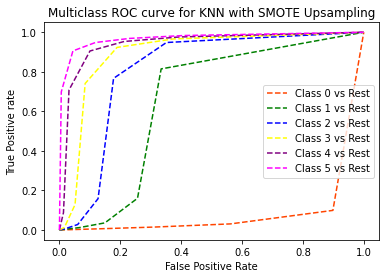

In [78]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_knn_SMOTE, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN with SMOTE Upsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN with SMOTE Upsampling',dpi=300)

#### <font color='darkblue'>KNN Algorithm with Near Miss downsampling

In [79]:
knn_classifier_NM = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn_classifier_NM.fit(X_train_dres_nm, y_train_dres_nm)
y_pred_knn_NM = knn_classifier_NM.predict(X_test)

In [80]:
print('Performance of KNN Algorithm with NM Downsampling:\n')
print(confusion_matrix(y_test, y_pred_knn_NM))
print(classification_report(y_test, y_pred_knn_NM))
print('Accuracy:',accuracy_score(y_test, y_pred_knn_NM))
print('Precision:',precision_score(y_test, y_pred_knn_NM, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn_NM, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn_NM, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn_NM))

Performance of KNN Algorithm with NM Downsampling:

[[57686 50572 53522 53198 40837 43430]
 [ 7713 18670 16448 14763 11573 13899]
 [ 2923  5931 14174 11606  7778 10137]
 [ 1458  2275  5125 11563  6613  7459]
 [  434   597  1256  3429  7626  5078]
 [   26    71   101   315  1240  5342]]
              precision    recall  f1-score   support

           0       0.82      0.19      0.31    299245
           1       0.24      0.22      0.23     83066
           2       0.16      0.27      0.20     52549
           3       0.12      0.34      0.18     34493
           4       0.10      0.41      0.16     18420
           5       0.06      0.75      0.12      7095

    accuracy                           0.23    494868
   macro avg       0.25      0.36      0.20    494868
weighted avg       0.57      0.23      0.27    494868

Accuracy: 0.2325084669043058
Precision: 0.5664887557511156
Recall: 0.2325084669043058
F1 Score: 0.2688785664243745
Cohen Kappa Score: 0.09355157402001324


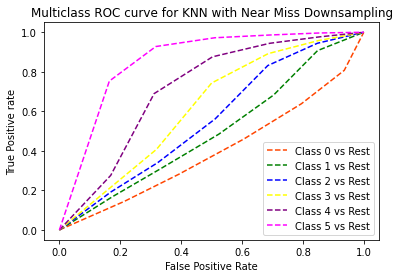

In [81]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_knn_NM, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN with Near Miss Downsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN with Near Miss Downsampling',dpi=300)

#### <font color='violet'>Naive Bayes Algorithm without resampling

In [84]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)
y_pred_NB = NB_classifier.predict(X_test)

In [85]:
print('Performance of Naive Bayes Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_NB))
print(classification_report(y_test, y_pred_NB))
print('Accuracy:',accuracy_score(y_test, y_pred_NB))
print('Precision:',precision_score(y_test, y_pred_NB, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_NB, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_NB, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_NB))

Performance of Naive Bayes Algorithm without resampling:

[[281528   1628   3406   8710   2381   1592]
 [ 73366    712   1663   5438   1148    739]
 [ 43498    623   1467   4848   1276    837]
 [ 26211    557   1241   4315   1163   1006]
 [ 13152    297    762   2603    692    914]
 [  5038     90    249    616    247    855]]
              precision    recall  f1-score   support

           0       0.64      0.94      0.76    299245
           1       0.18      0.01      0.02     83066
           2       0.17      0.03      0.05     52549
           3       0.16      0.13      0.14     34493
           4       0.10      0.04      0.05     18420
           5       0.14      0.12      0.13      7095

    accuracy                           0.59    494868
   macro avg       0.23      0.21      0.19    494868
weighted avg       0.45      0.59      0.48    494868

Accuracy: 0.5851439171657896
Precision: 0.4499104487639562
Recall: 0.5851439171657896
F1 Score: 0.4804411924156227
Cohen Kappa S

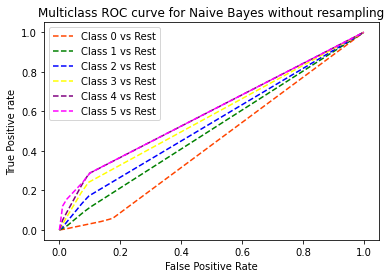

In [86]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_NB, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Naive Bayes without resampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Naive Bayes without resampling',dpi=300)

#### <font color='purple'>Random Forest Algorithm without resampling

In [87]:
RF_classifier = RandomForestClassifier(n_estimators = 20, max_depth=70, random_state=0)
RF_classifier.fit(X_train, y_train)
y_pred_RF = RF_classifier.predict(X_test)

In [88]:
print('Performance of RF Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))
print('Accuracy:',accuracy_score(y_test, y_pred_RF))
print('Precision:',precision_score(y_test, y_pred_RF, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_RF, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_RF, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_RF))

Performance of RF Algorithm without resampling:

[[288024   9584   1076    419    114     28]
 [ 29885  45332   6727    904    194     24]
 [ 11223   8427  27486   4859    501     53]
 [  5897   1630   5610  18536   2678    142]
 [  2681    605    989   3347   9793   1005]
 [   949    203    218    349   1250   4126]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90    299245
           1       0.69      0.55      0.61     83066
           2       0.65      0.52      0.58     52549
           3       0.65      0.54      0.59     34493
           4       0.67      0.53      0.59     18420
           5       0.77      0.58      0.66      7095

    accuracy                           0.79    494868
   macro avg       0.71      0.61      0.66    494868
weighted avg       0.78      0.79      0.78    494868

Accuracy: 0.794751327626761
Precision: 0.7808334153391845
Recall: 0.794751327626761
F1 Score: 0.7826590987940449
Cohen Kappa Score: 0.626

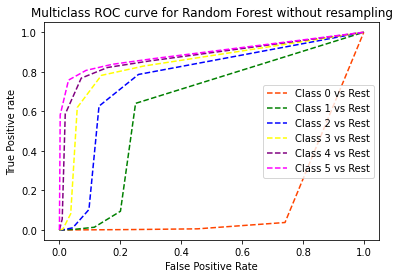

In [89]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_RF, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Random Forest without resampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Random Forest without resampling',dpi=300)

#### <font color='purple'>Random Forest Algorithm without resampling - Hyperparameter Tuning

In [17]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

In [18]:
RF_random = RandomizedSearchCV(estimator = RF_classifier, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=0, n_jobs = -1)
RF_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=70,
                                                    n_estimators=20,
                                                    random_state=0),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 14, 18, 23, 27, 32,
                                                         36, 41, 45, 50]},
                   random_state=0, verbose=2)

In [20]:
RF_random.best_params_

{'n_estimators': 50,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

#### <font color='purple'>Random Forest Algorithm without resampling - Setting the right Hyperparameters

In [90]:
RF_classifier = RandomForestClassifier(n_estimators = 50, max_depth=80, bootstrap=False, max_features='sqrt', random_state=0)
RF_classifier.fit(X_train, y_train)
y_pred_RF = RF_classifier.predict(X_test)

In [91]:
print('Performance of RF Algorithm without resampling - After Hyperparamter Tuning:\n')
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))
print('Accuracy:',accuracy_score(y_test, y_pred_RF))
print('Precision:',precision_score(y_test, y_pred_RF, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_RF, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_RF, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_RF))

Performance of RF Algorithm without resampling - After Hyperparamter Tuning:

[[289228   8807    823    277     94     16]
 [ 28166  47415   6515    776    170     24]
 [  9514   8757  28984   4818    435     41]
 [  4872   1207   5891  19751   2649    123]
 [  2120    381    803   3582  10541    993]
 [   771    112    150    280   1373   4409]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91    299245
           1       0.71      0.57      0.63     83066
           2       0.67      0.55      0.61     52549
           3       0.67      0.57      0.62     34493
           4       0.69      0.57      0.63     18420
           5       0.79      0.62      0.69      7095

    accuracy                           0.81    494868
   macro avg       0.73      0.64      0.68    494868
weighted avg       0.80      0.81      0.80    494868

Accuracy: 0.8089591567852438
Precision: 0.7969254562173812
Recall: 0.8089591567852438
F1 Score: 0.7986904178

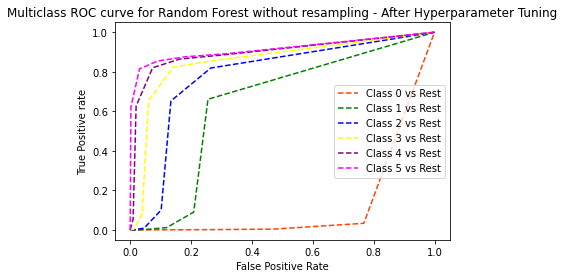

In [92]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_RF, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Random Forest without resampling - After Hyperparameter Tuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Random Forest without resampling - After Hyperparameter Tuning',dpi=300)

#### <font color='purple'>SVM Algorithm without resampling

In [ ]:
svm_classifier = SVC(kernel='poly', degree=3, C = 1.0)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

In [ ]:
print('Performance of SVM Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print('Accuracy:',accuracy_score(y_test, y_pred_svm))
print('Precision:',precision_score(y_test, y_pred_svm, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_svm, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_svm, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_svm))

#### <font color='purple'>SVM with RBF Kernel without resampling

In [ ]:
svm_classifier = SVC(kernel='rbf', C = 1.0)
svm_classifier.fit(X_train, y_train)
y_pred_svm_rbf = svm_classifier.predict(X_test)

In [ ]:
print('Performance of SVM Algorithm with RBF Kernel without resampling:\n')
print(confusion_matrix(y_test, y_pred_svm_rbf))
print(classification_report(y_test, y_pred_svm_rbf))
print('Accuracy:',accuracy_score(y_test, y_pred_svm_rbf))
print('Precision:',precision_score(y_test, y_pred_svm_rbf, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_svm_rbf, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_svm_rbf, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_svm_rbf))

#### <font color='purple'>SVM with Polynomial Kernel of Degree 3 on Near Miss Downsampled Data

In [17]:
svm_classifier_nm = SVC(kernel='poly', degree=3, C = 1.0)
svm_classifier_nm.fit(X_train_dres_nm, y_train_dres_nm)
y_pred_svm_nm = svm_classifier_nm.predict(X_test)

In [20]:
print('Performance of SVM Algorithm with Near Miss downsampling:\n')
print(confusion_matrix(y_test, y_pred_svm_nm))
print(classification_report(y_test, y_pred_svm_nm))
print('Accuracy:',accuracy_score(y_test, y_pred_svm_nm))
print('Precision:',precision_score(y_test, y_pred_svm_nm, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_svm_nm, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_svm_nm, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_svm_nm))

Performance of SVM Algorithm with Near Miss downsampling:

[[115636  29149  68934  20117  23544  41865]
 [ 20091  10826  19211   6809   8952  17177]
 [  9811   5609  11631   5026   6625  13847]
 [  5117   3132   6241   3788   5177  11038]
 [  2130   1704   3236   1572   3097   6681]
 [   671    630   1083    470    989   3252]]
              precision    recall  f1-score   support

           0       0.75      0.39      0.51    299245
           1       0.21      0.13      0.16     83066
           2       0.11      0.22      0.14     52549
           3       0.10      0.11      0.10     34493
           4       0.06      0.17      0.09     18420
           5       0.03      0.46      0.06      7095

    accuracy                           0.30    494868
   macro avg       0.21      0.25      0.18    494868
weighted avg       0.51      0.30      0.36    494868

Accuracy: 0.2995344213002255
Precision: 0.5123237426347645
Recall: 0.2995344213002255
F1 Score: 0.36286713356946726
Cohen Kappa

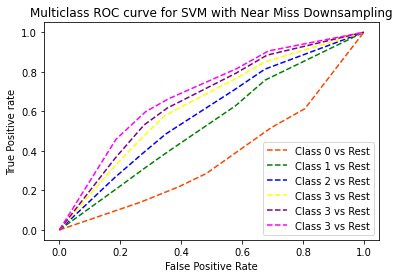

In [29]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_svm_nm, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for SVM with Near Miss Downsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for SVM with Near Miss Downsampling',dpi=300)